# Attenuation
Beer-Lambert's law is given by
$$
N_{dt} = N_0 \exp{-\mu x}
$$
where $\mu$ stands for the linear attenuation coefficient

## Mass attenuation coefficients of elements
$$
\mu = \sum_{i\in\mathsf{Interactions}} \mu_i = \rho \frac{\mathcal{N}_A}{A} \left(
\sum_{i\in\mathsf{Interactions}}\sigma_i\right)
$$
where $\sigma_i$, which does not depend on the density $\rho$, is the cross section (in cm$^2$) of interaction $i$ for the material

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import sys
import os
import numpy as np
import xraylib as xrl
import xraylib_np as xrl_np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tic
import matplotlib as mpl

xrl.XRayInit()
xrl.SetErrorMessages(0)

def mu(Z=13,components=False):
    energy_range = np.arange(5.,800., 0.1, dtype=np.double)
    density = xrl.ElementDensity(Z)
    mu_rho = [xrl.CS_Total(Z, E) for E in energy_range]
    if components:
        mu_rho_Photo = [xrl.CS_Photo(Z, E) for E in energy_range]
        mu_rho_Compt = [xrl.CS_Compt(Z, E) for E in energy_range]
        mu_rho_Rayl = [xrl.CS_Rayl(Z, E) for E in energy_range]
    plt.figure(dpi=150)
    mpl.rcParams.update({'font.size': 6})
    axMW = plt.subplot(111)
    axMW.plot(energy_range, mu_rho,color="black",linewidth=2.,linestyle="-",label='Total')
    if components:
        axMW.plot(energy_range, mu_rho_Photo,color="red",linewidth=2.,linestyle="-",label='Photoelectric')
        axMW.plot(energy_range, mu_rho_Compt,color="blue",linewidth=2.,linestyle="-",label='Compton')
        axMW.plot(energy_range, mu_rho_Rayl,color="green",linewidth=2.,linestyle="-",label='Rayleigh')
    axMW.set_xscale('log')
    axMW.set_yscale('log')
    axMW.set_xlim(5.,800.)
    axMW.set_ylim(0.01,1000.)
    plt.legend(loc='center right', frameon=True)
    plt.xlabel('keV')
    plt.ylabel('cm$^{2}\\cdot$ g$^{-1}$')
    axMW.grid(which='major', axis='x', linewidth=0.5, linestyle='-', color='0.75')
    axMW.grid(which='minor', axis='x', linewidth=0.3, linestyle='-', color='0.75')
    axMW.grid(which='major', axis='y', linewidth=0.5, linestyle='-', color='0.75')
    axMW.grid(which='minor', axis='y', linewidth=0.3, linestyle='-', color='0.75')
    axMW.xaxis.set_major_formatter(tic.FormatStrFormatter("%d"))
    #axMW.xaxis.set_minor_formatter(tic.FormatStrFormatter("%d"))
    axMW.grid(True)
    symbol=xrl.AtomicNumberToSymbol(Z)
    axMW.set_title("Mass attenuation coefficient vs energy for (%s) (density = (%.2f))" % (symbol,density), va='bottom')
    #plt.savefig('mu_over_rho_W.pdf', format='PDF')
    
    plt.show()

interact(mu,Z=(1,92,1),components=False,continuous_update=False);

interactive(children=(IntSlider(value=13, description='Z', max=92, min=1), Checkbox(value=False, description='…

## Cross-sections: dominant interaction domains

Separation curve where $\mu_{\mathsf{PhotoElectric}}\left(E\right)= \mu_{\mathsf{Compton}}\left(E\right)$ in terms of atomic number $Z$

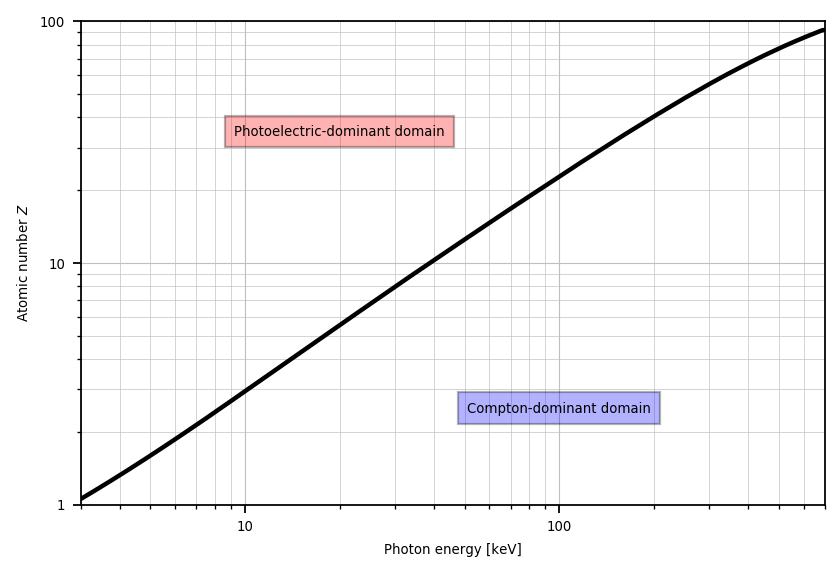

In [2]:
def equiv_CS():
    energy_range = np.arange(1.,700.1, 0.1, dtype=np.double)
    atomic_range = np.arange(1.,93., 1, dtype=np.int)
    energy_equiv = []
    Emin = 1.
    for Z in atomic_range:
        Equiv = -1
        for E in np.arange(Emin,700.1, 0.1, dtype=np.double):
            mu_rho_Photo = xrl.CS_Photo(Z, E)
            mu_rho_Compt = xrl.CS_Compt(Z, E)
            #print(f"PE({E})={mu_rho_Photo} <> CS({E})={mu_rho_Compt}")
            if  ((mu_rho_Photo < mu_rho_Compt)&(Equiv<0)):
                Emin = E
                Equiv = E
                energy_equiv.append(E)

    Z_equiv = np.interp(energy_range,energy_equiv,atomic_range)
    plt.figure(dpi=160)
    mpl.rcParams.update({'font.size': 6})
    axMW = plt.subplot(111)
    axMW.plot(energy_range, Z_equiv,color="black",linewidth=2.,linestyle="-")
    axMW.set_xscale('log')
    axMW.set_yscale('log')
    axMW.set_xlim(3.,700.)
    axMW.set_ylim(1,100.)
    plt.xlabel('Photon energy [keV]')
    plt.ylabel('Atomic number $Z$')
    axMW.text(100, 2.5,'Compton-dominant domain', horizontalalignment='center',verticalalignment='center',bbox=dict(facecolor='blue', alpha=0.3))
    axMW.text(20, 35,'Photoelectric-dominant domain', horizontalalignment='center',verticalalignment='center',bbox=dict(facecolor='red', alpha=0.3))
    axMW.grid(which='major', axis='x', linewidth=0.5, linestyle='-', color='0.75')
    axMW.grid(which='minor', axis='x', linewidth=0.3, linestyle='-', color='0.75')
    axMW.grid(which='major', axis='y', linewidth=0.5, linestyle='-', color='0.75')
    axMW.grid(which='minor', axis='y', linewidth=0.3, linestyle='-', color='0.75')
    axMW.xaxis.set_major_formatter(tic.FormatStrFormatter("%d"))
    axMW.yaxis.set_major_formatter(tic.FormatStrFormatter("%d"))
    #axMW.xaxis.set_minor_formatter(tic.FormatStrFormatter("%d"))
    axMW.grid(True)
    #symbol=xrl.AtomicNumberToSymbol(Z)
    #axMW.set_title(f"Mass attenuation coefficient vs energy for {symbol} (density = {density})", va='bottom')
    #plt.savefig('Equiv.pdf', format='PDF')
    
    plt.show()
                
equiv_CS()


## Linear attenuation coefficient of compound
The Bragg's addidivity rule is applied to compute the linear attenuation coefficient $\mu$ for a compound
$$
\mu = \sum_{m\in\mathsf{Materials}} \omega_m \frac{\mu_m}{\rho_m}
$$

In [6]:
def mus(mat1="Mg",rho1=1.74,mat2="C2F4",rho2=2.25):

    energy_range = np.arange(5.,800., 0.1, dtype=np.double)

    #cp_data = xrl.GetCompoundDataNISTByIndex(xrl.NIST_COMPOUND_RUBBER_BUTYL);

    mu1 = [xrl.CS_Total_CP(mat1, E) * float(rho1) for E in energy_range]
    mu2 = [xrl.CS_Total_CP(mat2, E) * float(rho2) for E in energy_range]

    #murho_Photo = xrl_np.CS_Photo(atomic_number, energy_range)
    #murho_Compt = xrl_np.CS_Compt(atomic_number, energy_range)
    #murho_Energy = xrl_np.CS_Energy(atomic_number, energy_range)
    #murho_Total = xrl_np.CS_Total(atomic_number, energy_range)

    plt.figure(1,dpi=150)
    mpl.rcParams.update({'font.size': 6})
    axMW = plt.subplot(111)
    axMW.plot(energy_range, mu1,color="black",linewidth=2.,linestyle="-",label=mat1)
    axMW.plot(energy_range, mu2,color="red",linewidth=1.5,linestyle="-",label=mat2)
    #axMW.plot(energy_range, W_murho_Energy[0])
    axMW.set_xscale('log')
    axMW.set_yscale('log')
    axMW.set_xlim(5.,800.)
    #axMW.set_ylim(0.05,1000.)
    plt.legend(loc='center right', frameon=True)
    plt.xlabel('Energy (keV)')
    plt.ylabel('Linear attenuation coefficient (cm$^{-1}$)')
    axMW.grid(which='major', axis='x', linewidth=0.5, linestyle='-', color='0.75')
    axMW.grid(which='minor', axis='x', linewidth=0.3, linestyle='-', color='0.75')
    axMW.grid(which='major', axis='y', linewidth=0.5, linestyle='-', color='0.75')
    axMW.grid(which='minor', axis='y', linewidth=0.3, linestyle='-', color='0.75')
    axMW.xaxis.set_major_formatter(tic.FormatStrFormatter("%d"))
    #axMW.xaxis.set_minor_formatter(tic.FormatStrFormatter("%d"))
    axMW.grid(True)
    axMW.set_title("Beer-Lambert", va='bottom')
    #plt.savefig('mu_over_rho_W.pdf', format='PDF')
    
    plt.show()

interact(mus,mat1="Mg",rho1=(0.,20,0.1),mat2="C2F4",rho2=(0.,20,0.1),continuous_update=False);

interactive(children=(Text(value='Mg', description='mat1'), FloatSlider(value=1.74, description='rho1', max=20…

## Differential cross section
The differential cross section (DCS) is the derivative of the cross section $\sigma$ wrt the solid angle
$$
DCS = \frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}
$$
and is expressed in cm$^2\cdot$sr$^{-1}$. It represents the probability for a photon to be scattered by a given direction $\theta$ away from the incident direction.

In [5]:
def dcs(Z=13,E=10.):
    atomic_number = np.array([Z])
    symbol=xrl.AtomicNumberToSymbol(Z)
    energies = np.array([E])
    theta = np.arange(0., 2.*np.pi, np.pi/1000., dtype=np.double)

    isotropic = np.ones(len(theta))/(4.*np.pi)
    
    dcs_Rayl = xrl_np.DCS_Rayl(atomic_number, energies, theta)
    cs_Rayl = xrl_np.CS_Rayl(atomic_number, energies)

    dcs_Compt = xrl_np.DCS_Compt(atomic_number, energies, theta)
    cs_Compt = xrl_np.CS_Compt(atomic_number, energies)

    rel_dcs_Rayl = np.divide(dcs_Rayl[0][0],cs_Rayl[0][0])
    rel_dcs_Compt = np.divide(dcs_Compt[0][0],cs_Compt[0][0])
    
    plt.figure(dpi=150)
    mpl.rcParams.update({'font.size': 6})
    axR = plt.subplot(121, projection='polar')
    axR.plot(theta, rel_dcs_Rayl, label="Rayleigh", color="red")
    axR.plot(theta, isotropic, 'b--', label="Isotropic")
    plt.legend(bbox_to_anchor=(0.95, 1), loc=2, frameon=False)
    max_rdcsR = max(rel_dcs_Rayl)
    plt.text(-0.5*np.pi,1.4*max_rdcsR,'${\\mu}/{\\rho}_{RS}$ = ' + "{0:0.3f}".format(cs_Rayl[0][0]) + ' cm$^2\\cdot$g$^{-1}$',ha='center',bbox=dict(facecolor='none',edgecolor='black',boxstyle='square'))
    axR.set_rlim(0,max(rel_dcs_Rayl))
    axR.grid(True)
    labelR='Normalized DCS (sr$^{-1}$) of '
    axR.set_title(labelR+symbol, y=1.15)

    axL = plt.subplot(122, projection='polar')
    axL.plot(theta, rel_dcs_Compt, label="Compton", color="green")
    axL.plot(theta, isotropic, 'b--', label="Isotropic")
    plt.legend(bbox_to_anchor=(0.95, 1), loc=2, frameon=False)
    max_rdcsC = max(rel_dcs_Compt)
    plt.text(-0.5*np.pi,1.4*max_rdcsC,'${\\mu}/{\\rho}_{CS}$ = ' + "{0:0.3f}".format(cs_Compt[0][0]) + ' cm$^2\\cdot$g$^{-1}$',ha='center',bbox=dict(facecolor='none',edgecolor='black',boxstyle='square'))
    axL.set_rlim(0,max(rel_dcs_Compt))
    axL.grid(True)
    labelL="Normalized DCS (sr$^{-1}$) of "
    axL.set_title(labelL+symbol, y=1.15)

    plt.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
    
interact(dcs,Z=(1,92,1),E=(1.,600.,1.),continuous_update=False);

interactive(children=(IntSlider(value=13, description='Z', max=92, min=1), FloatSlider(value=10.0, description…

# Compton scattering
The energy of the photon after Compton scattering depends on the angle (assuming no Doppler broadening)
$$
E_{CS} = \frac{E_0}{1+\frac{E_0}{mc^2}\left( 1 - \cos\theta_{CS}\right)}
$$

In [5]:
def CS_energy(E=100.):
    energies = np.array([E])
    angle_range_rad = np.arange(0.,180., 0.1, dtype=np.double)*np.pi/180.
    angle_range_deg = np.arange(0.,180., 0.1, dtype=np.double)
    
    energyCS = [xrl.ComptonEnergy(E,theta) for theta in angle_range_rad]
    energyCe = [(E - xrl.ComptonEnergy(E,theta)) for theta in angle_range_rad]

    plt.figure(1,dpi=150)
    mpl.rcParams.update({'font.size': 6})
    axMW = plt.subplot(111)
    axMW.plot(angle_range_deg, energyCS,color="blue",linewidth=2.,linestyle="-",label="photon")
    axMW.plot(angle_range_deg, energyCe,color="green",linewidth=2.,linestyle="-",label="e-")
    plt.legend(loc='center left', frameon=True)
    plt.xlabel('degrees')
    plt.ylabel('keV')
    axMW.set_xlim(0.,180.)
    axMW.set_ylim(0.,E)
    axMW.grid(which='major', axis='x', linewidth=0.5, linestyle='-', color='0.75')
    axMW.grid(which='minor', axis='x', linewidth=0.3, linestyle='-', color='0.75')
    axMW.grid(which='major', axis='y', linewidth=0.5, linestyle='-', color='0.75')
    axMW.grid(which='minor', axis='y', linewidth=0.3, linestyle='-', color='0.75')
    axMW.xaxis.set_major_formatter(tic.FormatStrFormatter("%d"))
    axMW.xaxis.set_minor_formatter(tic.FormatStrFormatter("%d"))
    axMW.grid(True)
    axMW.set_title("Energy of the Compton scatter", va='bottom')
    
    plt.show()

interact(CS_energy,E=(1,5000,1),continuous_update=False);


interactive(children=(IntSlider(value=100, description='E', max=5000, min=1), Output()), _dom_classes=('widget…

# Refractive index: Phase vs Attenuation
The complex refractive index is defined as
$$n = 1 - \delta + i \beta$$
where
$$\beta = \mu \frac{\lambda}{\pi}$$
the EM-wave amplitude is
$$u = I_0 \exp\left(i \frac{2\pi}{\lambda}\int_{r\in ray} n(r) \; dr\right)
 = I_0 \exp\left(- \frac{2\pi}{\lambda}\int_{r\in ray} \beta(r) \; dr\right)
 \exp\left(i \frac{2\pi}{\lambda}\int_{r\in ray} \left(1 - \delta(r)\right) \; dr\right)$$
which gives in terms of EM-wave energy
$$ N_{DT} E = \left\|u\right\|^2 = \left( I_0 \exp\left(- \frac{2 \pi}{\lambda}\int_{r\in ray} \beta \; dr\right) \right)^2
= I_0 \exp\left(-\int_{r\in ray} \mu \; dr\right)$$

In [6]:
def DeltaBeta(mat="Al"):

    energy_range = np.arange(5.,800., 0.1, dtype=np.double)

    rho = 1.
    ratio = [ (1. - xrl.Refractive_Index_Re(mat, E, float(rho)))/xrl.Refractive_Index_Im(mat, E, float(rho)) for E in energy_range]
    
    plt.figure(1,dpi=150)
    axMW = plt.subplot(111)
    axMW.plot(energy_range, ratio,color="red",linewidth=2.,linestyle="-",label=mat)
    #axMW.plot(energy_range, W_murho_Energy[0])
    axMW.set_xscale('log')
    axMW.set_yscale('log')
    axMW.set_xlim(5.,800.)
    #axMW.set_ylim(0.05,50.)
    plt.legend(loc='lower right', frameon=True)
    plt.xlabel('Energy (keV)')
    plt.ylabel('Ratio $\\delta/\\beta$')
    axMW.grid(which='major', axis='x', linewidth=0.5, linestyle='-', color='0.75')
    axMW.grid(which='minor', axis='x', linewidth=0.3, linestyle='-', color='0.75')
    axMW.grid(which='major', axis='y', linewidth=0.5, linestyle='-', color='0.75')
    axMW.grid(which='minor', axis='y', linewidth=0.3, linestyle='-', color='0.75')
    axMW.xaxis.set_major_formatter(tic.FormatStrFormatter("%d"))
    #axMW.xaxis.set_minor_formatter(tic.FormatStrFormatter("%d"))
    axMW.grid(True)
    axMW.set_title("Phase vs Attenuation", va='bottom')
    #plt.savefig('mu_over_rho_W.pdf', format='PDF')
    
    plt.show()

interact(DeltaBeta,mat="Al",continuous_update=False);

interactive(children=(Text(value='Al', description='mat'), Output()), _dom_classes=('widget-interact',))

In [7]:
import sys
sys.path

['/home/letang/Anaconda/Xray',
 '/usr/local/root/lib',
 '/usr/local/geant4.10.05.p01/environments/g4py/lib',
 '',
 '/usr/local/lib/python3.5/site-packages',
 '/home/letang/anaconda3/lib/python37.zip',
 '/home/letang/anaconda3/lib/python3.7',
 '/home/letang/anaconda3/lib/python3.7/lib-dynload',
 '/home/letang/anaconda3/lib/python3.7/site-packages',
 '/home/letang/anaconda3/lib/python3.7/site-packages/syris-0.1-py3.7.egg',
 '/home/letang/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/letang/.ipython']